In [1]:
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
net = pd.read_csv('datasets//Internet-Demographic.csv')

In [3]:
net

,Country Name,Country Code,Birth rate,Internet users,Income Group
0,Aruba,ABW,10.244,78.9,High income
1,Afghanistan,AFG,35.253,5.9,Low income
2,Angola,AGO,45.985,19.1,Upper middle income
3,Albania,ALB,12.877,57.2,Upper middle income
4,United Arab Emirates,ARE,11.044,88.0,High income
...,...,...,...,...,...
190,"Yemen, Rep.",YEM,32.947,20.0,Lower middle income
191,South Africa,ZAF,20.850,46.5,Upper middle income
192,"Congo, Dem. Rep.",COD,42.394,2.2,Low income
193,Zambia,ZMB,40.471,15.4,Lower middle income


In [4]:
net.drop(columns = 'Country Code', inplace=True)

In [5]:
net.isnull().sum()

Country Name      0
Birth rate        0
Internet users    0
Income Group      0
dtype: int64

In [6]:
net['Country Name'] = net['Country Name'].astype('category')
net['Income Group'] = net['Income Group'].astype('category')

In [7]:
net.dtypes

Country Name      category
Birth rate         float64
Internet users     float64
Income Group      category
dtype: object

<h1>#1 Birth rate using histogram</h1>

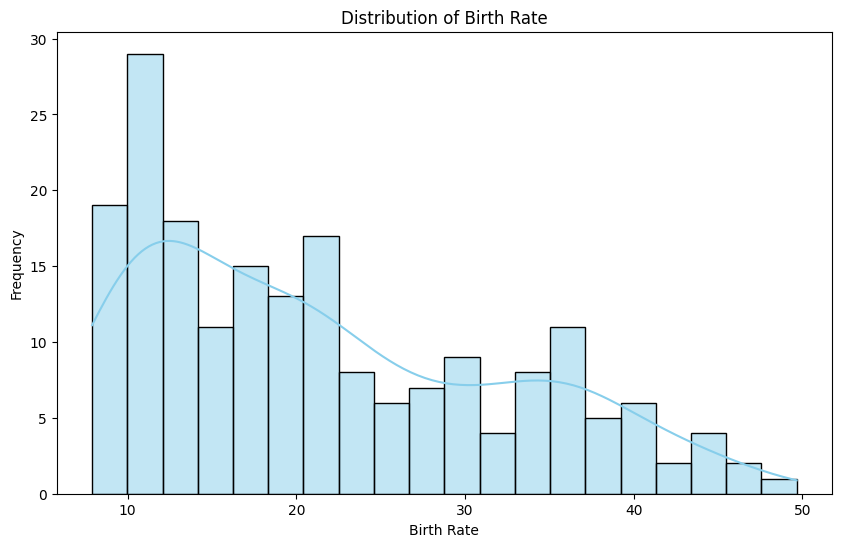

In [8]:
plt.figure(figsize=(10, 6))

sns.histplot(net['Birth rate'], bins=20, kde=True, color='skyblue')

plt.xlabel('Birth Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Birth Rate')

plt.show()

<h1>#2 Top 5 Internet users</h1>

In [9]:
net['Internet users'].mean()

np.float64(42.07647089194872)

In [10]:
net2 = net[net['Internet users']>42]
net2['Internet users'].mean()

np.float64(67.686133746875)

In [11]:
net2 = net[net['Internet users']>94]

In [12]:
net2

,Country Name,Birth rate,Internet users,Income Group
22,Bermuda,10.4,95.3000,High income
47,Denmark,10.0,94.6297,High income
84,Iceland,13.4,96.5468,High income
131,Norway,11.6,95.0534,High income
163,Sweden,11.8,94.7836,High income


<h1>#3 Count of countries by income group</h1>

In [13]:
income_group_counts = net['Income Group'].value_counts()

print(income_group_counts)

Income Group
High income            67
Lower middle income    50
Upper middle income    48
Low income             30
Name: count, dtype: int64


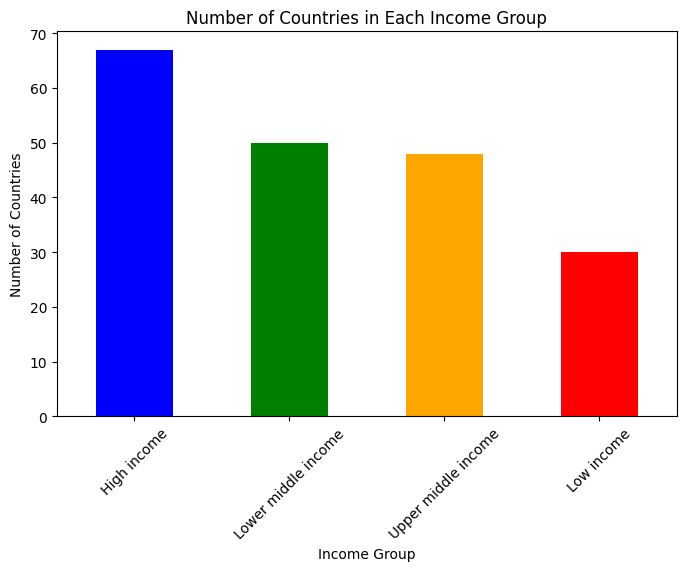

In [14]:
plt.figure(figsize=(8, 5))
income_group_counts.plot(kind='bar', color=['blue', 'green', 'orange', 'red'])

plt.xlabel('Income Group')
plt.ylabel('Number of Countries')
plt.title('Number of Countries in Each Income Group')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.show()

<h1>#4 boxplot Internet usage</h1>

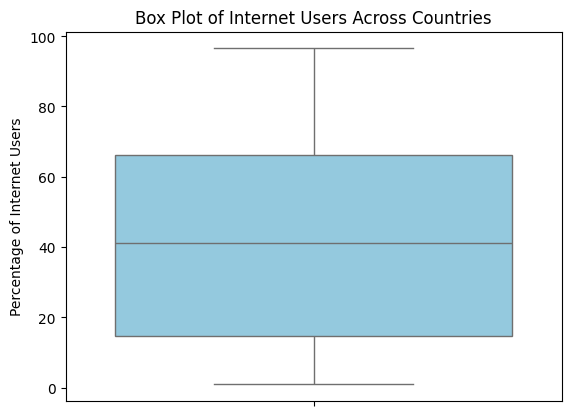

In [15]:
sns.boxplot(y=net['Internet users'], color='skyblue')

plt.ylabel('Percentage of Internet Users')
plt.title('Box Plot of Internet Users Across Countries')

plt.show()

<H1>#5 Number of countries ith no internet</H1>

In [16]:
no_internet_countries = net[net['Internet users'] == 0]['Country Name']

print(no_internet_countries.tolist())


[]


In [18]:
print(net['Internet users'].min())


0.9


In [29]:
no_internet_countries = net[net['Internet users'] < 1]['Country Name']
print(no_internet_countries)


52    Eritrea
Name: Country Name, dtype: category
Categories (195, object): ['Afghanistan', 'Albania', 'Algeria', 'Angola', ..., 'West Bank and Gaza', 'Yemen, Rep.', 'Zambia', 'Zimbabwe']


<h1>#6 Average Birth Rate</h1>

In [23]:
net['Birth rate'].mean()

np.float64(21.469928205128202)

<h1>#7 Scatter Plot: Birth Rate VS. Internet Usage</h1>

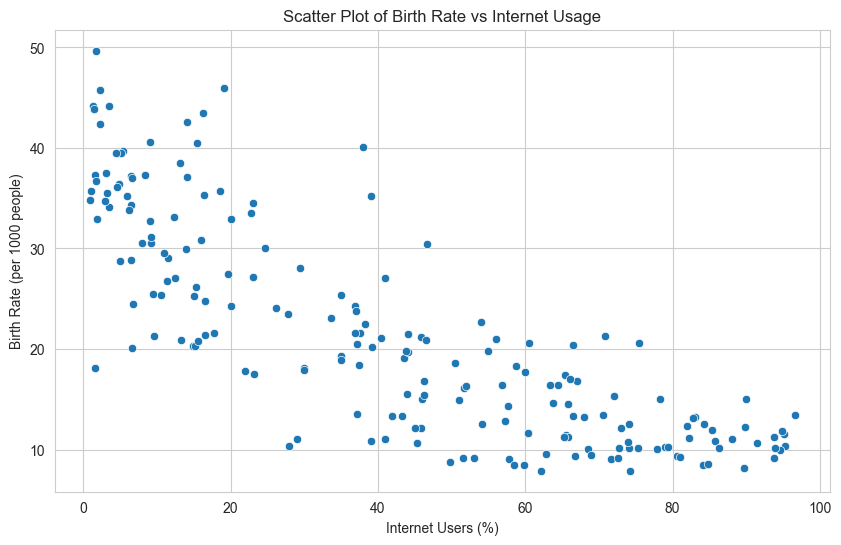

In [24]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=net['Internet users'], y=net['Birth rate'])

plt.xlabel("Internet Users (%)")
plt.ylabel("Birth Rate (per 1000 people)")
plt.title("Scatter Plot of Birth Rate vs Internet Usage")

plt.show()

<h1>#8 Countries with the birth rate above 40</h1>

In [28]:
high_birth_rate_countries = net[net['Birth rate'] > 40]['Country Name']

print(high_birth_rate_countries)


2                Angola
11              Burundi
14         Burkina Faso
65          Gambia, The
115                Mali
127               Niger
128             Nigeria
156             Somalia
167                Chad
178              Uganda
192    Congo, Dem. Rep.
193              Zambia
Name: Country Name, dtype: category
Categories (195, object): ['Afghanistan', 'Albania', 'Algeria', 'Angola', ..., 'West Bank and Gaza', 'Yemen, Rep.', 'Zambia', 'Zimbabwe']


<h1>#9 Pie Chart of Income Group</h1>

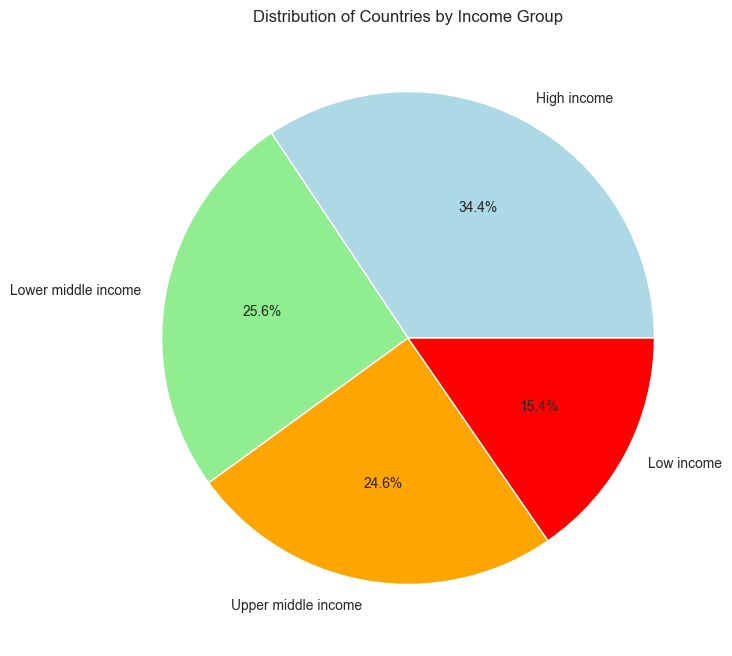

In [30]:
import matplotlib.pyplot as plt

# Count the number of countries in each income group
income_group_counts = net['Income Group'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(income_group_counts, labels=income_group_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'orange', 'red'])
plt.title("Distribution of Countries by Income Group")
plt.show()


<h1> #10 correlation between birth rate and internet usage</h1>

In [34]:
correlation = net[['Birth rate', 'Internet users']].corr()
print(correlation)


                Birth rate  Internet users
Birth rate        1.000000       -0.815589
Internet users   -0.815589        1.000000
